# <font color='red'>4.1 Importing libraries</font>

In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle
from framework.ImageFeatures import ImageFeatures,getvoxelsize
from framework.Functions import cv2toski,pylsdtoski,polar_to_cartesian, remove_not1D, quantitative_analysis,hist_bin,hist_lim,create_separate_DFs,branch,graphAnalysis
from framework.Importing import label_image,init_import
from framework.PreProcessingCYTO import cytoskeleton_preprocessing, df_cytoskeleton_preprocessing
from framework.PreProcessingNUCL import excludeborder, nuclei_preprocessing, df_nuclei_preprocessing, nuclei_segmentation
from framework.Processing import process3Dnuclei,analyze_cell,df_analyze_cell
from framework.visualization import truncate_colormap, plot_hist, plot_pie
#from fractal_dimension import fractal_dimension
#from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


#### <center><font color='grey'>Directories</font></center>

In [2]:
### DATASET #1 (2D)
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"
options   = ["RGB","CYTO_DECONV","NUCL_DECONV"]

### DATASET #2 (3D)
#folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 3D"
#options   = ["3D"]

### DATASET #3 (Soraia)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
# options   = ["3D"]

### DATASET #4 (Inês)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Ines"
#options     = []


data = init_import(folder,options)
data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 

>>> [RGB] added.
>>> [CYTO_DECONV] added.
>>> [NUCL_DECONV] added.


# <font color='red'>4.2 Import and Create DataFrame with available images</font>

In [ ]:
global OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF
OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF = init_import()  # Import Images, add to DataFrame
Centroids = pickle.load(open('Centroids.p', 'rb'))
TextureDF = pd.read_pickle(os.getcwd() + "\\TextureDF.pkl")   
#dir_masks = os.getcwd() + str("//nuclei_masks")

print('🌠')

In [ ]:
#OriginalDF
#DeconvDF
#DenoisedDF
#NoiseDF
#NucleiDeconvDF
#Centroids
TextureDF

# <font color='red'>4.3 Import ROIs DataFrame or Initialize a new one</font>

In [3]:
global ROIs

# OPTION 1: Import ROIs
#ROIs    = pickle.load(open('ROIs.p', 'rb'))  

# OPTION 2: Create new dataset
ROIs    = pd.DataFrame(columns = ['Name','Index','Label','ROImask'])
    
print('✔️')

✔️


In [4]:
ROIs

,Name,Index,Label,ROImask


# <font color='red'>4.4 ROI Management</font>


# <font color='red'>4.4.1 Define ROI and perform single cell analysis </font>

In [4]:
def plot_hist(ImageLinesDF,feat,bins):
    cmap = pltc.Reds
    global new_cmap
    new_cmap = truncate_colormap(cmap, 0.3, 1, 300)
    
    global data
    data = ImageLinesDF.tail(1)
    global histog,bin_edges
    
#     if feat == 'Distances to Centroid':
#         bins = np.arange(0, 280 + 5, 5)
#     if feat == 'Triangle Areas':
#         bins = np.arange(0, 4600 + 5, 5)
#     if feat == 'Line Lengths':
#         # max(data[feat][data.index[0]])
#         bins = np.arange(0, 220 + 5, 5)
#     if feat == 'Theta':
#         bins = np.arange
#     if feat == 'Angle Difference':
#         bins = np.arange
    
    histo = np.histogram(data[feat][data.index[0]],bins=bins[0])
    
    # AX1
    plt.figure()
    ax1 = plt.subplot(1,1,1)
    ax1.set_ylabel('Absolute Frequency')
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.tick_params(axis='y', colors=pltc.Reds_r(0))

    
    global colours
    #colours = pltc.Reds(plt.Normalize(0, max(histog[0]))(histog[0]),alpha=0.7)
    #colours = new_cmap(plt.Normalize(0, max(histo[0]))(histo[0]),alpha=0.7)

    #ax1.bar(histog[1][:-1],histog[0],color=colours,zorder=5)
    histog, bin_edges, patches = ax1.hist(data[feat][data.index[0]], bins=bins[0],color='k',alpha=0.7,edgecolor = "white")
    #ax1.color = new_cmap(plt.Normalize(0, max(histog))(histog),alpha=0.7)
    for c, p in zip(histog, patches):
        plt.setp(p, 'facecolor', new_cmap(plt.Normalize(0, max(histog))(c), alpha = 0.7))
    
    # AX2
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Relative Frequency')  
    _ = ax2.hist(data[feat][data.index[0]], bins=bins[0], density=True,color='k',alpha=0.7,fill=False,histtype='step',ls='dashed')
    #ax2.plot(histog[1][:-1],(histog[0]/np.trapz(histog[0],x=histog[1][:-1])),'--',alpha=0,zorder=1)
    plt.grid(alpha=0.3)
    
    if feat == 'Angles':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Angle between Centroid and Line Segment',fontsize=12)
        ax1.set_xticks(bin_edges)
    if feat == 'Distances to Centroid':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Distance between Centroid and Line Segment',fontsize=12)
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        #ax1.set_xticks(np.linspace(0,130,10,endpoint=True,dtype=int))
        
    if feat == 'Triangle Areas':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Triangle Areas between Centroid and Line Segment',fontsize=12)
        #ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        
    if feat == 'Line Lengths':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Line Length',fontsize=12)
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        #ax1.set_xticks(np.linspace(0,170,10,endpoint=True,dtype=int))
        
    if feat == 'Theta':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Line Segment Angle',fontsize=12)
        ax1.set_xticks(bin_edges)
        
    if feat == 'Angle Difference':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Angle Difference (º)',fontsize=12)
        ax1.set_xticks(bin_edges)
    
    ax1.set_xticks(hist_bin(feat)[1])
    ax1.set_xticklabels(hist_bin(feat)[1],rotation=45, ha='right', rotation_mode='anchor')
            
    #plt.savefig(".//CellVSCellAnalysis//" + str(feat) + ".png",format='png',transparent=True,bbox_inches='tight')
    plt.show()
    
#OU

def plot_hist(ImageLinesDF,feat,bins):
    cmap = pltc.Reds
    global new_cmap
    new_cmap = truncate_colormap(cmap, 0.3, 1, 300)
    
    global data
    data = ImageLinesDF.tail(1)
    global histog,bin_edges
    
#     if feat == 'Distances to Centroid':
#         bins = np.arange(0, 280 + 5, 5)
#     if feat == 'Triangle Areas':
#         bins = np.arange(0, 4600 + 5, 5)
#     if feat == 'Line Lengths':
#         # max(data[feat][data.index[0]])
#         bins = np.arange(0, 220 + 5, 5)
#     if feat == 'Theta':
#         bins = np.arange
#     if feat == 'Angle Difference':
#         bins = np.arange
    
    histo = np.histogram(data[feat][data.index[0]],bins=bins)
    
    # AX1
    plt.figure()
    ax1 = plt.subplot(1,1,1)
    ax1.set_ylabel('Absolute Frequency')
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    global colours
    #colours = pltc.Reds(plt.Normalize(0, max(histog[0]))(histog[0]),alpha=0.7)
    #colours = new_cmap(plt.Normalize(0, max(histo[0]))(histo[0]),alpha=0.7)

    #ax1.bar(histog[1][:-1],histog[0],color=colours,zorder=5)
    histog, bin_edges, patches = ax1.hist(data[feat][data.index[0]], bins=bins,color='k',alpha=0.7)
    #ax1.color = new_cmap(plt.Normalize(0, max(histog))(histog),alpha=0.7)
    for c, p in zip(histog, patches):
        plt.setp(p, 'facecolor', new_cmap(plt.Normalize(0, max(histog))(c), alpha = 0.7))
    
    # AX2
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Relative Frequency')  
    _ = ax2.hist(data[feat][data.index[0]], bins=bins, density=True, alpha=0)
    #ax2.plot(histog[1][:-1],(histog[0]/np.trapz(histog[0],x=histog[1][:-1])),'--',alpha=0,zorder=1)
    plt.grid(alpha=0.3)
    
    if feat == 'Angles':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Angle between Centroid and Line Segment',fontsize=12)
        ax1.set_xticks(bin_edges)
    if feat == 'Distances to Centroid':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Distance between Centroid and Line Segment',fontsize=12)
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        #ax1.set_xticks(np.linspace(0,130,10,endpoint=True,dtype=int))
        
    if feat == 'Triangle Areas':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Triangle Areas between Centroid and Line Segment',fontsize=12)
        #ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        
    if feat == 'Line Lengths':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Line Length',fontsize=12)
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        #ax1.set_xticks(np.linspace(0,170,10,endpoint=True,dtype=int))
        
    if feat == 'Theta':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Line Segment Angle',fontsize=12)
        ax1.set_xticks(bin_edges)
        
    if feat == 'Angle Difference':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Angle Difference (º)',fontsize=12)
        ax1.set_xticks(bin_edges)
    
    #plt.savefig(".//CellVSCellAnalysis//" + str(data.index) + str("_") + str(feat) + ".png",format='png',transparent=True,bbox_inches='tight')
    plt.show()
    
    

print('plot_hist 2 VERSÕES')

plot_hist 2 VERSÕES


In [4]:
# Quantitative Analysis
def quantitative_analysis(ImageLinesDF):
    feats = list(ImageLinesDF.columns[3:])
    cmap = pltc.Reds
    global new_cmap
    new_cmap = truncate_colormap(cmap, 0.3, 1, 300)
    
    #histog = np.histogram(np.array(feat_concat[~np.isnan(feat_concat)]),bins=30)
    # plt.plot(histog[1][:-1],histog[0]/np.sum(histog[0]),color=colors[labels.index(label)],linewidth=4,label = label,alpha=0.7)
    flag = False
    global feat
    for feat in feats:

        if feat == 'Angles':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=180)
            #plot_hist(feat=feat,bins=np.linspace(0,90,91))
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))

        elif feat == 'Distances to Centroid':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=30)
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            #aux = []
            #for i in range(len(histog[1])-1):
            #    aux += [np.pi*(histog[1][i+1])**2 - np.pi*(histog[1][i])**2]
            #ax2.plot(histog[1][:-1],(histog[0]/np.trapz(histog[0],x=histog[1][:-1]))/aux,'--',label='uga',alpha=0)
 
        elif feat == 'Triangle Areas':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=30)
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
        
        elif feat == 'Line Lengths':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=30)
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            
        elif feat == 'Theta':
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            
        elif feat == 'Angle Difference':
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            
        elif feat == 'Number of Lines':
            plot_pie(ImageLinesDF=ImageLinesDF,feat=feat,Max=400)
            #flag = True
            
        else:
        #    #print("Fractal Dimension: " + str(ImageLinesDF[feat][ImageLinesDF[feat].index[0]]))
            print(str(feat) + ": " + str(ImageLinesDF.tail(1)[feat][ImageLinesDF.tail(1).index[0]]))
    
    global comb
    comb = combinations(range(len(feats[:6])), 2)
    data = ImageLinesDF.tail(1)
    for f in list(comb):
        fig, ax = plt.subplots()
        f1 = feats[f[0]]
        f2 = feats[f[1]]
        if f1 == 'Angles' or f1 == 'Theta' or f1 == 'Angle Difference':
            bin1 = np.linspace(0,90,10)
        else:
            bin1 = 15
        if f2 == 'Angles' or f2 == 'Theta' or f2 == 'Angle Difference':
            bin2 = np.linspace(0,90,10)
        else:
            bin2 = 15
        
        #plt.figure(figsize=(15,15))
        hi, xedges, yedges, image = plt.hist2d(data[feats[f[0]]][data.index[0]],data[feats[f[1]]][data.index[0]],bins=[bin1,bin2],cmap=cmap,alpha=0.7)   
        ax.set_xticks(xedges)
        ax.set_yticks(np.linspace(0,yedges[-1],10,endpoint=True,dtype=int))
        ax.set_facecolor(cmap(0))
        plt.xlabel(feats[f[0]])
        plt.ylabel(feats[f[1]])
        #plt.title('Line Segment Angles vs. Distances to Centroid')
        cbar = fig.colorbar(image, ax=ax)
        cbar.set_label("Absolute Frequency")
        plt.show()
        
#     # HEATMAP 1
#     fig, ax = plt.subplots()
#     data = ImageLinesDF.tail(1)
#     hi, xedges, yedges, image = plt.hist2d(data['Angles'][data.index[0]],data['Distances to Centroid'][data.index[0]],bins=[np.linspace(0,90,10), np.arange(0, 280 + 5, 5)],cmap=cmap,alpha=0.7)   
#     ax.set_facecolor(cmap(0))
#     plt.xlabel('Angle (º)')
#     plt.ylabel('Distance to Centroid (pixels)')
#     plt.title('Line Segment Angles vs. Distances to Centroid')
#     cbar = fig.colorbar(image, ax=ax)
#     cbar.set_label("Absolute Frequency")
#     plt.show()
    
#     # HEATMAP 2
#     fig, ax = plt.subplots()
#     data = ImageLinesDF.tail(1)
#     hi, xedges, yedges, image = plt.hist2d(data['Line Lengths'][data.index[0]],data['Distances to Centroid'][data.index[0]],bins=[30,30],cmap=cmap,alpha=0.7)   
#     plt.xlabel('Line Lengths (pixels)')
#     plt.ylabel('Distance to Centroid (pixels)')
#     plt.title('Line Segment Lengths vs. Distances to Centroid')
#     cbar = fig.colorbar(image, ax=ax)
#     cbar.set_label("Absolute Frequency")
#     plt.show()


print('FUNCTION: quantitative_analysis') 

FUNCTION: quantitative_analysis


In [5]:
def plot_nuclei_contours(CentroidsDF,imgIndex,ax):
    for index,row in CentroidsDF[imgIndex].iterrows():
        if type(imgIndex) != int:
            ax.plot(row['Centroid'][1],row['Centroid'][0],'o',color='r',markersize=7,zorder=5)
        else:
            ax.plot(row['Centroid'][1],row['Centroid'][0],'o',color='b',markersize=7,zorder=5)
            try:
                contourr  = row['Contour'][0]
                cr = contourr.reshape((contourr.shape[0],contourr.shape[2]))
            except:
                contourr  = row['Contour']
                cr = contourr.reshape((contourr.shape[0],contourr.shape[2]))
            ax.plot(cr[:,0],cr[:,1],'--',color='w',zorder=11,linewidth=2)

print('plot_nuclei_contours')

plot_nuclei_contours


In [6]:
def plot_pie(ImageLinesDF,feat,Max):
    cmap = pltc.Reds
    global new_cmap
    new_cmap = truncate_colormap(cmap, 0.3, 1, 300)
    
    global data
    data = ImageLinesDF.tail(1)
    
    # Pie chart
    labels = [feat, '-']
    if feat == 'Number of Lines':
        sizes = [data[feat][data.index[0]], Max]
        
    colors = [new_cmap(plt.Normalize(0, Max)(data[feat][data.index[0]]), alpha = 0.7),'w']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=[sizes[0],'-'], startangle=90)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white',ec='black')
    plt.gcf().gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    
print('FUNCTION: plot_pie')

FUNCTION: plot_pie


In [7]:
import warnings
warnings.filterwarnings("ignore")

# Dropdown and Label
dropdown_image     = widgets.Dropdown(description =  'Select Image:' , options = ['Select image'] + list(DeconvDF.index))
label_text         = widgets.Text(value='', description='Label:', disabled=True)
dropdown_and_label = widgets.HBox([dropdown_image, label_text])

# Texture Sliders
# slider_gamma   = widgets.IntSlider(min=1,max=1000,step=100,description='Gamma:',value=500)
# slider_thr     = widgets.IntSlider(min=0,max=20,step=1,description='Threshold:',value=0)
# slider_linelen = widgets.FloatSlider(min=0,max=10,step=0.5,description='LineLen/Scale:',value=2.5)
# slider_linegap = widgets.IntSlider(min=0,max=10,step=1,description='LineGap:',value=1)
# sliders        = widgets.HBox([slider_gamma, slider_thr, slider_linelen, slider_linegap])

# # To Add
radiobutton_to_add = widgets.RadioButtons(options=['Yes','No'], description='Add cell to ROIs DataFrame?',value='No')

# Calculate Button
button = widgets.Button(value=False, description='Calculate', disabled=False, button_style='')

# Outputs
output_ROI      = widgets.Output()
output_RES      = widgets.Output()

# Event Handler Functions
def ROI_eventhandler(change):
    image = DeconvDF['Image'][dropdown_image.value]
    
    # Select ROI QT
    %matplotlib qt
    fig,ax = plt.subplots(figsize=(15,15))
    ax.imshow(image,cmap='gray')
    ax.axis('off')
    
    # Plot nuclei contours and centroids
    plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=dropdown_image.value,ax=ax)

    # Skeleton
    fig_s,ax_s = plt.subplots(figsize=(15,15))
    ax_s.imshow(TextureDF['Skeleton'][dropdown_image.value],cmap='gray')
    ax_s.axis('off')
    
    # Plot nuclei contours and centroids
    plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=dropdown_image.value,ax=ax_s)

    # Draw ROI and get Coordinates
    global ROI,mask
    ROI = RoiPoly(color='r')
    ROI.display_roi()
    mask = ROI.get_mask(image) #roi_coordinates = ROI.get_roi_coordinates()
    %matplotlib inline
    
    with output_ROI:
        plt.figure(figsize=(15,10))
        plt.subplot(1,3,1)
        
        # Plot Original
        copia = copy.deepcopy(OriginalDF['Image'][dropdown_image.value])
        auxiliar = mask * OriginalDF['Image'][dropdown_image.value][:,:,2]
        xxx,yyy = np.where(auxiliar != 0)
        helpp = np.zeros_like(auxiliar[min(xxx):max(xxx),min(yyy):max(yyy)])
        auxiliar = np.stack((auxiliar[min(xxx):max(xxx),min(yyy):max(yyy)],helpp,helpp),axis=2)
#         copia[:,:,0] = auxiliar[min(xxx):max(xxx),min(yyy):max(yyy)]
#         copia[:,:,1] = np.zeros_like(copia[:,:,0])
#         copia[:,:,2] = np.zeros_like(copia[:,:,0])
        plt.imshow(auxiliar)
        plt.title('Original')
        plt.axis('off')
        
        # Plot Deconvoluted
        plt.subplot(1,3,2)
        auxiliar = mask * image
        xxx,yyy = np.where(auxiliar != 0)
        plt.imshow(auxiliar[min(xxx):max(xxx),min(yyy):max(yyy)],cmap='gray')
        plt.title('Deconvoluted')
        plt.axis('off')
        
        # Plot Skeleton
        plt.subplot(1,3,3)
        sk = TextureDF['Skeleton'][dropdown_image.value]
        plt.imshow(np.max(sk[min(xxx):max(xxx),min(yyy):max(yyy)])-sk[min(xxx):max(xxx),min(yyy):max(yyy)],cmap='gray')
        plt.title('Skeleton')
        plt.axis('off')
        plt.show()
                
    # Define Texture and Analyse Parameters
    #display(sliders)
    display(radiobutton_to_add)
    #text_ske_eventhandler(change)
    
         
def text_ske_eventhandler(change):
    if type(dropdown_image.value) != int:
        algorithm = 'synthetic'
    else:
        algorithm = 1
    #texture,skeleton,TextureDF = img_getTexture([mask * DeconvDF['Image'][dropdown_image.value],dropdown_image.value,DeconvDF['Name'][dropdown_image.value],DeconvDF['Label'][dropdown_image.value]], sigmas=[0.03], gamma=change.new, algorithm=1,TextureDF=TextureDF,to_add=radiobutton_to_add.value)
    skeleton = img_preprocessing(image=[OriginalDF['Image'][dropdown_image.value],dropdown_image.value], algorithm='original',parameters=[0.03,500],plot=False)

    with output_ROI:
        print('o')
        plt.clf()
        plt.figure(figsize=(10,10))
        
        x_x,y_y = np.where(texture != 0)
        #plt.imshow(texture[min(x_x):max(x_x),min(y_y):max(y_y)],cmap='gray')
        plt.axis('off')
        plt.imshow(DeconvDF['Image'][dropdown_image.value],cmap='gray')
        plt.show()
#         plt.subplot(1,2,2)
#         x_x,y_y = np.where(skeleton != 0)
#         plt.imshow(skeleton[min(x_x):max(x_x),min(y_y):max(y_y)],cmap='gray')
#         plt.axis('off')
#         plt.show()
            
def RES_eventhandler(change):
    output_RES.clear_output()
    #image = DeconvDF['Image'][dropdown_image.value]
    
    
    with output_RES:
        %matplotlib inline
        
#         if type(dropdown_image.value) != int:
#             texture,skeleton,TextureDF = img_getTexture([mask * DeconvDF['Image'][dropdown_image.value],dropdown_image.value,DeconvDF['Name'][dropdown_image.value],DeconvDF['Label'][dropdown_image.value]], sigmas=[0.03], gamma=slider_gamma.value, algorithm='synthetic',TextureDF=TextureDF,to_add=radiobutton_to_add.value)  
#         else:
         
        global ImageLinesDF
        %matplotlib qt
        if radiobutton_to_add.value == 'texture':
            ImageLinesDF = analyze_cell([texture, dropdown_image.value],mask,[slider_thr.value,slider_linelen.value,slider_linegap.value],Centroids[dropdown_image.value],DeconvDF,NucleiDeconvDF,True)
        if radiobutton_to_add.value == 'skeleton':
            ImageLinesDF = analyze_cell([skeleton, dropdown_image.value],mask,[slider_thr.value,slider_linelen.value,slider_linegap.value],Centroids[dropdown_image.value],DeconvDF,NucleiDeconvDF,True)
        
        #ResultsDF = analyze_cell([skeleton, dropdown_image.value],mask,[2,2.5,1],Centroids[dropdown_image.value],DeconvDF,NucleiDeconvDF,True)
        ResultsDF = analyze_cell([skeleton, dropdown_image.value,texture],row['ROImask'],[2,2.5,1],Centroids[row['Index']],OriginalDF,DeconvDF,NucleiDeconvDF,True)
        
        quantitative_analysis(ResultsDF)

def dropdown_image_eventhandler(change):
    output_ROI.clear_output()
    output_RES.clear_output()
    
    global img_id
    img_id = dropdown_image.value
    label_text.value = DeconvDF['Label'][dropdown_image.value]
    
    with output_ROI:
        ROI_eventhandler(change)
        #text_ske_eventhandler(change)
        display(button)
        
# OBSERVE    
#radiobuttons_original.observe(radiobuttons_original_eventhandler, names='value')
dropdown_image.observe(dropdown_image_eventhandler, names='value')
                             
# Display initial widgets
display(dropdown_and_label)

# CALCULATE AND ADD ROI
with output_RES:
    button.on_click(RES_eventhandler)
    if radiobutton_to_add.value == 'Yes':
        new  = pd.DataFrame(data = {'Name': [DeconvDF['Name'][img_id]],'Index': [img_id], 'Label': [DeconvDF['Label'][img_id]], 'ROImask': [mask]})
        ROIs = ROIs.append(new,ignore_index=True)

# TABS
tab = widgets.Tab([output_ROI, output_RES])
tab.set_title(0, 'Select ROI'); tab.set_title(1, 'Results')

display(tab)

## Image Generator 

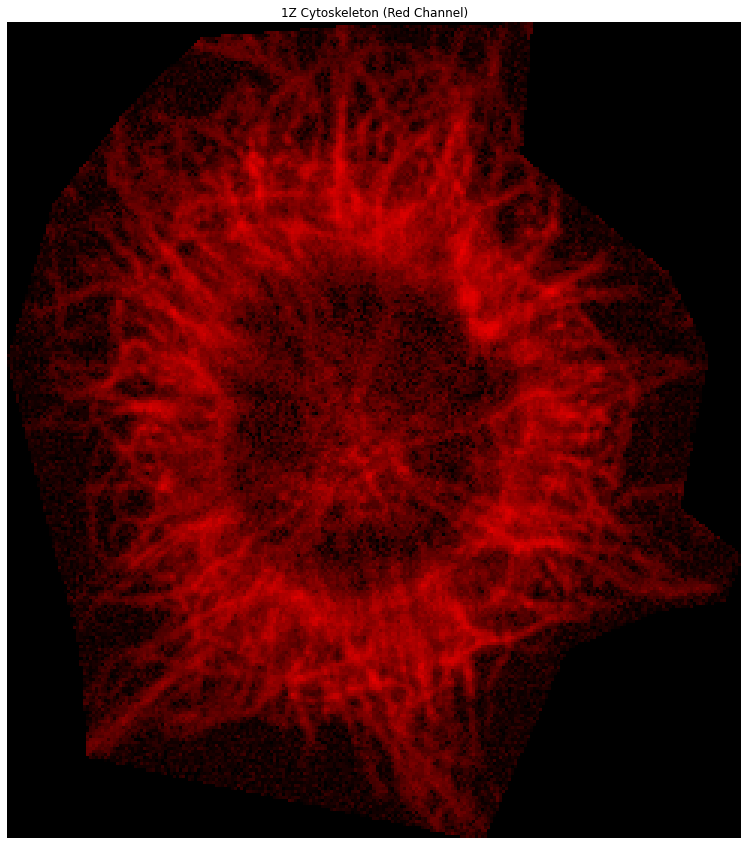

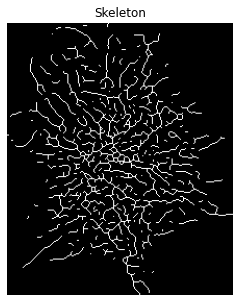

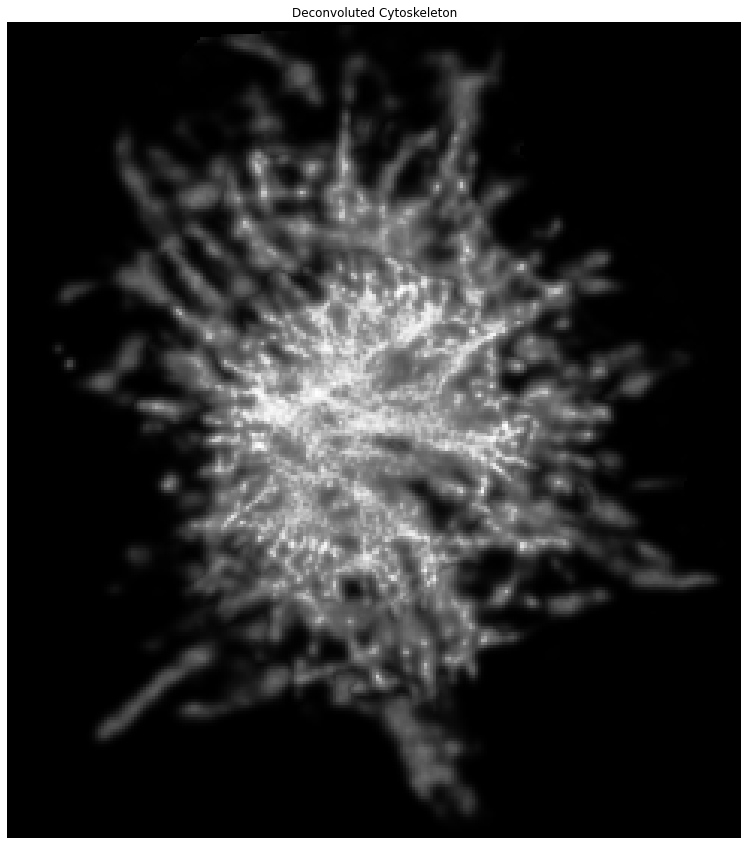

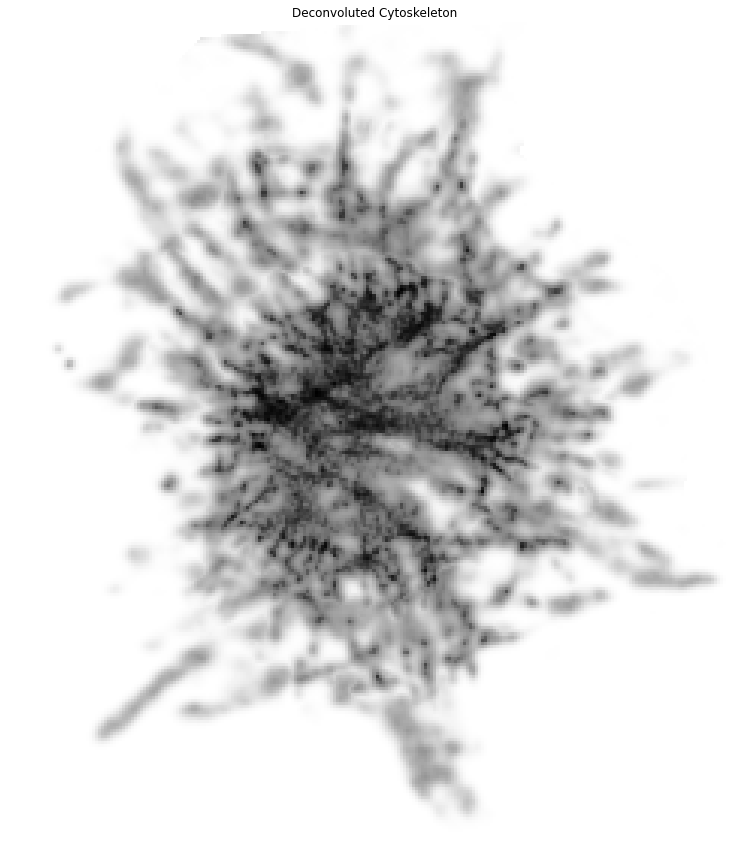

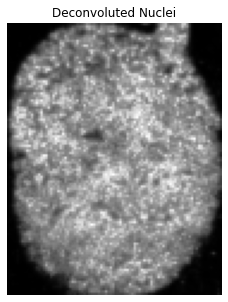

In [6]:
# Original
%matplotlib inline
plt.figure(figsize=(15,15))
copia = copy.deepcopy(OriginalDF['Image'][img_id])
auxiliar = mask * OriginalDF['Image'][img_id][:,:,2]
xxx,yyy = np.where(auxiliar != 0)
helpp = np.zeros_like(auxiliar[min(xxx):max(xxx),min(yyy):max(yyy)])
auxiliar = np.stack((auxiliar[min(xxx):max(xxx),min(yyy):max(yyy)],helpp,helpp),axis=2)
#         copia[:,:,0] = auxiliar[min(xxx):max(xxx),min(yyy):max(yyy)]
#         copia[:,:,1] = np.zeros_like(copia[:,:,0])
#         copia[:,:,2] = np.zeros_like(copia[:,:,0])
plt.imshow(auxiliar)
plt.title('1Z Cytoskeleton (Red Channel)')
plt.axis('off')
plt.show()

# Patch (Skeleton)
plt.figure(figsize=(5,5))
plt.imshow(patch,cmap='gray')
plt.title('Skeleton')
plt.axis('off')
plt.show()


# Deconv Cyto
plt.figure(figsize=(15,15))
plt.imshow(patch_f,cmap='gray')
plt.title('Deconvoluted Cytoskeleton')
plt.axis('off')
plt.show()

# Deconv Inv Cyto
plt.figure(figsize=(15,15))
plt.imshow(np.max(patch_f) - patch_f,cmap='gray')
#plt.title('Deconvoluted Cytoskeleton')
plt.axis('off')
plt.show()

# Deconv Nuclei
plt.figure(figsize=(5,5))
plt.imshow(patch_n,cmap='gray')
plt.title('Deconvoluted Nuclei')
plt.axis('off')
plt.show()

In [53]:
def img_preprocessing(image, algorithm, parameters,plot):
    # image      = [image, image index]
    # parameters = [sigmas, gamma]
    
    # Imports
    from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu, laplace, threshold_yen, rank
    from skimage.util import img_as_ubyte
    from skimage.morphology import extrema, skeletonize, disk
    from skimage import filters
    
    global texture,skeleton,e,s
    if algorithm == 1:
        # Hessian detection
        hessian_img = hessian(image[0],black_ridges=False,sigmas=parameters[0],mode='reflect',gamma=parameters[1])
        
        # Repair image to apply to cv2 algorithm
        hessian_img = hessian_img.astype(np.uint8)  # hessian_img *= 1 # or 255
        hessian_img = 1 - hessian_img
        
        # Get texture
        texture = hessian_img
        
        # Connect
        binary_adaptive = threshold_local(texture, 3,'median')
        #o = grey_closing(TextureDF['Image'][11], size=(5,5))
        otsu = threshold_otsu(binary_adaptive)
        texture = binary_adaptive > otsu
        
        # Skeleton
        skeleton = skeletonize(texture)
        
    if algorithm == 'contour':
        
        # Contour Detection
        contours, hierarchy = cv2.findContours(image[0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  

        # Filter contours with area above certain threshold
        filt_contours = []
        remo_contours = []
        for contour in contours:
            if cv2.contourArea(contour) > 10:
                filt_contours.append(contour)
            else:
                remo_contours.append(contour)

        # Draw contours
        contour_out = np.zeros_like(image[0])
        removed_out = np.zeros_like(contour_out)
        cv2.drawContours(contour_out, filt_contours, -1, 255, 3)
        cv2.drawContours(removed_out, remo_contours, -1, 255, 3)

        # Draw inside contour lines
        contour_int = np.zeros_like(image[0]) 
        cv2.fillPoly(contour_int, pts = filt_contours, color=(255,255,255))

        # Hessian detection
        hessian_img = hessian(image[0],black_ridges=False,sigmas=parameters[0],mode='reflect',gamma=parameters[1])
        
        # Repair image to apply to cv2 algorithm
        hessian_img = hessian_img.astype(np.uint8)  # hessian_img *= 1 # or 255
        hessian_img = 1 - hessian_img
        
        
        # Get texture image
        texture = contour_int * hessian_img
        
        # Skeleton
        #skeleton = skeletonize(texture)
        
        return texture, contour_out, contour_int
        

        #
        #thr = threshold_otsu(skeleton)
        #a = cv2.Canny((skeleton * 255).astype(np.uint8), 1*thr, 0.75*thr)
    
    if algorithm == 'sato':
        # METHOD 2
        texture = sato(image[0], sigmas=parameters[0], black_ridges = False, mode = 'reflect')
        thr = threshold_otsu(texture)
        texture[texture > 0.3*thr] = 1
        skeleton = skeletonize(texture)
        
    if algorithm == 'meijing':
        texture = meijering(image[0], sigmas = parameters[0], black_ridges = False, mode = 'reflect')

        thr = threshold_otsu(texture)
        #cont = cv2.Canny((meij * 255).astype(np.uint8), 1*thr, 0.75*thr)

        texture[texture > 0.2*thr] = 1
        
        # Skeleton
        skeleton = skeletonize(texture)
        
    if algorithm == 'synthetic':
        # image = [image, image index, image name, image label]
        skeleton = image[0]
        #skeleton = skeletonize(image[0]/255)
        texture = skeleton
        
    if algorithm == 'new':
        ini = image[0] / np.max(image[0])
        #gau = gaussian_filter(ini, sigma=1)
        
        kernel = np.array([[-1, -1, -1],[-1, 17, -1], [-1,-1, -1]])*1/9
        gau = cv2.filter2D(src=image[0].astype(np.uint16) , ddepth=-1, kernel=kernel)


        s = sato(gau,black_ridges=False,sigmas=[parameters[0]],mode='reflect') 
        h = hessian(s,black_ridges=False,sigmas=[parameters[1]],mode='reflect') 
        texture = ((1 - h)!=0)*1
        skeleton = skeletonize(texture)
        
    if algorithm == 'original':
        global f
        
        # Remove blue channel and convert to grayscale
        tmp        = copy.deepcopy(image[0])
        tmp[:,:,0] = 0
        grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

        # Median filter for noise removal
        grey_       = rank.median(img_as_ubyte(grey), disk(2))

        # CLAHE for color adjustment
        clahe      = cv2.createCLAHE(clipLimit = 2, tileGridSize = (8,8))
        gra        = clahe.apply(grey_)

        # Gaussian filter and Otsu thresholding
        thresh_ori = threshold_otsu(gra)
        binary_ori = gra > thresh_ori*0.8
        temp       = binary_ori * gra
        gau = gaussian_filter(temp, sigma=0.1)

        # Sato filter
        s = sato(gau,black_ridges=False,sigmas=[3],mode='reflect') 

        # LAPLACIAN OPERATOR
        d = laplace(s)

        # CLAHE
        clahe  = cv2.createCLAHE(clipLimit =2, tileGridSize=(8,8))
        e = clahe.apply(((d - d.min()) * (1/(d.max() - d.min()) * 255)).astype('uint8'))

        # OTSU
        thresh_ori = threshold_otsu(e)
        binary_ori = e > thresh_ori
        f = binary_ori * e

        # HYSTERESIS THRESHOLDING
        low = 0#int(np.max(f)*0.2)
        high = 1#int(np.max(f)*0.4)
        minima = filters.apply_hysteresis_threshold(f, low, high)

        # Yen thresholding
        # PROBLEMA: BACKGROUND COLOR NOS ~150 EM VEZ DE 0. COMO CORRIGIR? YEN NÃO FUNCIONA BEM PARA FIBRAS MENOS INTENSAS
        thresh_yen = threshold_yen(minima)
        binary_yen = minima > thresh_yen
        texture_pre = binary_yen * minima
        texture = texture_pre * temp

        # Skeletonization
        if len(np.where(minima*1 == 1)[0]) > len(np.where(minima*1 == 0)[0]):
            skeleton_pre = skeletonize(1-texture_pre*1)
        else:
            skeleton_pre = skeletonize(texture_pre*1)

        # Contour Detection
        contours, hierarchy = cv2.findContours((skeleton_pre*1).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  

        # Filter contours with area above certain threshold
        remo_contours = []
        for contour in contours:
            if len(contour) <= 3:
                remo_contours.append(contour)

        removed_out = np.zeros_like(texture)
        cv2.fillPoly(removed_out, pts = remo_contours, color=(255,255,255))

        # Get final skeleton
        skeleton = skeleton_pre*1 - removed_out/255
 

    if plot:
        #plt.close('all')
        %matplotlib qt
        plt.figure(figsize=(15,15)); plt.title('original');              plt.imshow(ini,cmap='gray');
        plt.show()
        plt.figure(figsize=(15,15)); plt.title('gaussian');              plt.imshow(gau,cmap='gray');
        plt.show()
        plt.figure(figsize=(15,15)); plt.title('sato');                  plt.imshow(s,cmap='gray');
        plt.show()
        plt.figure(figsize=(15,15)); plt.title('hessian');               plt.imshow(h,cmap='gray');
        plt.show()
        plt.figure(figsize=(15,15)); plt.title('texture');               plt.imshow(texture,cmap='gray');
        plt.show()
        plt.figure(figsize=(15,15)); plt.title('skeleton');              plt.imshow(skeleton,cmap='gray');
        plt.show()

        # ORIGINAL
#         plt.figure(figsize=(15,15)); plt.title('Original');                      plt.imshow(grey,cmap='gray'); 
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('Original -> Median Filter');     plt.imshow(grey_,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('Median Filter -> CLAHE');        plt.imshow(gra,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('CLAHE -> Otsu');                 plt.imshow(temp,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('Otsu -> Gaussian filter');       plt.imshow(gau,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('Gaussian filter -> Sato');       plt.imshow(s,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('Sato -> Laplace');               plt.imshow(d,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('Laplace -> CLAHE');              plt.imshow(e,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('CLAHE -> Otsu and Hyst. Thr.');  plt.imshow(minima,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('Otsu and Hyst. Thr. -> Yen Thr -> * by temp -> TEXTURE'); plt.imshow(texture,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('TEXTURE -> SKELETON');           plt.imshow(skeleton_pre,cmap='gray');
#         plt.show()
#         plt.figure(figsize=(15,15)); plt.title('SKELETON -> SKELETON FILT.');    plt.imshow(skeleton,cmap='gray');
#         plt.show()

    return texture,skeleton

print('FUNCTION: img_preprocessing COPIED FROM 3')

FUNCTION: img_preprocessing COPIED FROM 3


In [55]:
texture,skeleton = img_preprocessing(image = [DeconvDF['Image'][9],9], algorithm='new', parameters = [3,0.005],plot=True)
    

In [18]:
%matplotlib qt
for i in [200]:
    row = ROIs.loc[i]
    # Get Texture / Skeleton (might need an "if" statement for synthetic)
    global texture,skeleton,h
    #TextureDF = pd.DataFrame(columns=['Name','Label','Image'])

    texture,skeleton = img_preprocessing(image = [DeconvDF['Image'][row['Index']],row['Index']], algorithm='new', parameters = [3,0.006],plot=True)
    #texture,skeleton,TextureDF = img_getTexture([row['ROImask'] * DeconvDF['Image'][row['Index']],row['Index'],row['Name'],row['Label']], sigmas=[0.03], gamma=500, algorithm='new',TextureDF=TextureDF,to_add='skeleton')
    #texture,skeleton,TextureDF = img_getTexture([OriginalDF['Image'][row['Index']],row['Index'],row['Name'],row['Label']], sigmas=[0.03], gamma=500, algorithm='original',TextureDF=TextureDF,to_add='skeleton')

    print(row['Index'])
    # Analyse cell
    #ResultsDF = analyze_cell([skeleton, row['Index']],row['ROImask'],[2,2.5,1],Centroids[row['Index']],DeconvDF,NucleiDeconvDF,False)
    #ResultsDF = analyze_cell([skeleton, row['Index']],row['ROImask'],[2,2.5,1],Centroids[row['Index']],OriginalDF,DeconvDF,NucleiDeconvDF,True)


UnboundLocalError: local variable 'gau' referenced before assignment

In [10]:
%matplotlib qt
n=0
for index,row in ROIs.iterrows():
    #if n == 5:
    # Get Texture / Skeleton (might need an "if" statement for synthetic)
    global texture,skeleton,h,patch,patch_f,mask,x_,y_

    print(row['Index'])

    skeleton = TextureDF.loc[row['Index']]['Skeleton']
    # Analyse cell
    ResultsDF,mask,patch,x_,y_,patch_f,patch_n = analyze_cell([skeleton, row['Index']],row['ROImask'],[2,2.5,1],Centroids[row['Index']],OriginalDF,DeconvDF,NucleiDeconvDF,'original',False)

    #n=n+1

40


spectral.py (1966): nperseg = 256 is greater than input length  = 226, using nperseg = 226
spectral.py (1966): nperseg = 256 is greater than input length  = 133, using nperseg = 133


40


spectral.py (1966): nperseg = 256 is greater than input length  = 203, using nperseg = 203
spectral.py (1966): nperseg = 256 is greater than input length  = 105, using nperseg = 105


9


spectral.py (1966): nperseg = 256 is greater than input length  = 219, using nperseg = 219
spectral.py (1966): nperseg = 256 is greater than input length  = 129, using nperseg = 129


9


spectral.py (1966): nperseg = 256 is greater than input length  = 215, using nperseg = 215
spectral.py (1966): nperseg = 256 is greater than input length  = 114, using nperseg = 114


9


spectral.py (1966): nperseg = 256 is greater than input length  = 124, using nperseg = 124
spectral.py (1966): nperseg = 256 is greater than input length  = 92, using nperseg = 92


9


spectral.py (1966): nperseg = 256 is greater than input length  = 81, using nperseg = 81


9


spectral.py (1966): nperseg = 256 is greater than input length  = 227, using nperseg = 227
spectral.py (1966): nperseg = 256 is greater than input length  = 75, using nperseg = 75


11


spectral.py (1966): nperseg = 256 is greater than input length  = 182, using nperseg = 182


63


spectral.py (1966): nperseg = 256 is greater than input length  = 117, using nperseg = 117


63


spectral.py (1966): nperseg = 256 is greater than input length  = 110, using nperseg = 110


59


spectral.py (1966): nperseg = 256 is greater than input length  = 116, using nperseg = 116


66


spectral.py (1966): nperseg = 256 is greater than input length  = 222, using nperseg = 222
spectral.py (1966): nperseg = 256 is greater than input length  = 88, using nperseg = 88


In [11]:
ResultsDF

,Name,Img Index,Label,Mask,Patches,Lines,Graph,LSF2D:Angles,LSF2D:Distances to Centroid,LSF2D:Triangle Areas,...,SKNW:Sholl Crossings Nuclei max_amp,SKNW:Sholl Crossings Nuclei var,SKNW:Sholl Crossings Nuclei std_dev,SKNW:Sholl Crossings Nuclei abs_dev,SKNW:Sholl Crossings Nuclei kurtosis,SKNW:Sholl Crossings Nuclei skewness,OTHERS:Cytoskeleton-Nuclei Centroid Distance,OTHERS:Weighted Cytoskeleton-Nuclei Centroid Distance,OTHERS:Area Ratio (Cyto vs. Nucl),OTHERS:Main Vector Magnitude
0,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,40,Del38_46,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((268.69, 591.721), (261.346, 596.709)), ((33...","[ (1, 2)\t1.4142135623730951\n (2, 1)\t1.414...","[82.333, 44.788, 39.991, 6.532, 17.107, 29.431...","[45.594, 47.836, 17.353, 83.376, 51.973, 81.60...","[200.575, 281.884, 104.033, 39.048, 93.224, 22...",...,15.285714,79.327731,8.906612,7.714286,-1.429263,0.488159,0.383721,12.225343,0.979594,2638.480114
1,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,40,Del38_46,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((441.783, 724.322), (438.088, 721.166)), ((4...","[ (1, 2)\t1.0\n (1, 3)\t1.4142135623730951\n...","[82.06, 9.015, 0.859, 62.333, 87.827, 79.584, ...","[63.082, 49.595, 61.144, 18.759, 49.489, 46.81...","[151.8, 25.475, 4.115, 28.304, 173.01, 207.494...",...,20.138889,104.923016,10.243194,8.361111,-0.987354,0.752603,0.731224,8.563665,0.974313,2106.931944
2,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((460.086, 141.161), (465.481, 144.675)), ((4...","[ (1, 2)\t1.4142135623730951\n (2, 1)\t1.414...","[59.34, 71.669, 55.308, 3.728, 46.605, 33.976,...","[31.872, 114.617, 8.635, 83.015, 59.005, 29.63...","[88.259, 313.766, 22.891, 13.268, 116.585, 28....",...,29.974359,155.657220,12.476266,10.153846,-0.611726,0.775349,0.901252,14.960838,0.847645,3203.385268
3,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((297.944, 171.401), (292.647, 164.678)), ((2...","[ (1, 2)\t1.4142135623730951\n (2, 1)\t1.414...","[73.607, 29.009, 3.428, 48.9, 74.098, 30.602, ...","[30.962, 34.876, 29.244, 85.981, 58.905, 68.25...","[127.115, 98.311, 11.17, 287.736, 294.209, 117...",...,22.921053,142.236842,11.926309,9.500000,-0.844550,0.813370,0.892313,15.546314,0.845604,3033.588999
4,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((895.842, 129.116), (890.902, 122.42)), ((87...","[ (1, 2)\t1.4142135623730951\n (2, 1)\t1.414...","[2.643, 41.401, 87.986, 1.781, 27.26, 10.24, 4...","[33.799, 25.772, 38.575, 8.939, 32.7, 29.486, ...","[6.485, 81.845, 331.885, 0.695, 31.748, 13.927...",...,21.578947,56.701754,7.530057,5.421053,2.537633,1.586488,0.643803,4.634855,0.889961,774.134312
5,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((713.126, 119.701), (720.091, 124.821)), ((6...","[ (1, 2)\t1.4142135623730951\n (2, 1)\t1.414...","[37.739, 82.571, 15.333, 54.024, 35.372, 29.45...","[2.765, 45.187, 12.109, 38.086, 37.249, 35.828...","[7.315, 232.916, 10.287, 139.389, 136.854, 47....",...,14.300000,38.221053,6.182318,4.700000,0.098341,1.128564,0.980122,3.818295,0.908264,967.176812
6,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((524.55, 598.167), (537.612, 608.739)), ((54...","[ (1, 2)\t1.4142135623730951\n (2, 1)\t1.414...","[59.103, 9.817, 26.708, 24.73, 80.704, 31.328,...","[44.31, 9.274, 21.613, 44.943, 181.704, 60.742...","[319.463, 5.369, 20.581, 40.418, 875.148, 111....",...,9.733333,8.117117,2.849055,1.89333

---------------

# <font color='red'>ROI storing</font>

In [318]:
# ---------
img_id = 34
# ---------

In [5]:
global ROI
print('🔎')
while 1:
    plt.close('all')

    # Original Image
    img = OriginalDF['Image'][img_id]
    sk  = TextureDF.loc[img_id]['Skeleton']

    # Remove blue channel and convert to grayscale
    tmp        = copy.deepcopy(img)
    tmp[:,:,0] = 0
    grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

    #mult = np.stack([1.3*(grey / np.max(grey)),1.3*sk*(grey / np.max(grey)), np.zeros_like(sk)],axis=2)
    #mult = np.stack([0.9*(grey / np.max(grey)),sk*(grey / np.max(grey)), 0.5 * (OriginalDF['Image'][img_id][:,:,0] / np.max(OriginalDF['Image'][img_id][:,:,0]))],axis=2)
    mult = np.stack([1.5*(grey / np.max(grey)),sk, 0.2 * (OriginalDF['Image'][img_id][:,:,0] / np.max(OriginalDF['Image'][img_id][:,:,0]))],axis=2)

    
    # Select ROI QT
    %matplotlib qt
    fig,ax = plt.subplots(figsize=(30,30))

    plt.imshow(mult)
    plt.axis('off')
    # Plot Contours
    plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=img_id,ax=ax)
    # Define ROI
    #plt.imshow(image, cmap='gray')
    ROI = RoiPoly(color='r')
    #ROI.display_roi()
    global mask 
    mask = ROI.get_mask(sk)

    # Save ROI
    new = pd.DataFrame(data = {'Name': [DeconvDF['Name'][img_id]],'Index': [img_id], 'Label': [DeconvDF['Label'][img_id]], 'ROImask': [mask]})
    ROIs = ROIs.append(new,ignore_index=True)

    plt.show()


🔎


NameError: name 'OriginalDF' is not defined

In [305]:
#np.unique(ROIs['Index'])

# Remove last
#ROIs = ROIs[:-1]

ROIs

,Name,Index,Label,ROImask
0,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa..."
1,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa..."
2,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa..."
3,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa..."
4,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa..."
...,...,...,...,...
839,MAX_44_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,44,Del38_46,"[[False, False, False, False, False, False, Fa..."
840,MAX_44_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,44,Del38_46,"[[False, False, False, False, False, False, Fa..."
841,MAX_44_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,44,Del38_46,"[[False, False, False, False, False, False, Fa..."
842,MAX_44_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,44,Del38_46,"[[False, False, False, False, False, False, Fa..."


# <font color='red'>Observe stored ROIs</font>

**TO DO**: CHANGE CELL BELOW TO ANALYZE WHOLE DATASET

In [8]:
img_id=11

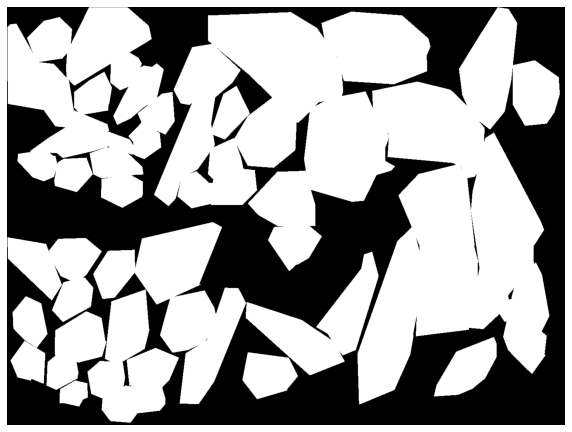

In [12]:
%matplotlib inline
df = ROIs[ROIs['Index']==img_id]

i = 0
for index,row in df.iterrows():
    if i == 0:
        auxx = row['ROImask']
        i = 1
    else:
        auxx = auxx + row['ROImask']

fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(auxx,cmap='gray')
#plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=img_id,ax=ax)
plt.axis('off')
# for index,row in Centroids[img_id].iterrows():
#     if type(img_id) != int:
#         plt.plot(row['Centroid'][1],row['Centroid'][0],'o',color='r',markersize=7,zorder=5)
#     else:
#         plt.plot(row['Centroid'][1],row['Centroid'][0],'o',color='b',markersize=7,zorder=5)
#plt.savefig(".//maski.png",format='png',transparent=True,bbox_inches='tight',dpi=500)
plt.show()
        
#for cell in df['ROImask']:
#    analyze_cell([texture, dropdown_image.value],mask,[slider_thr.value,slider_linelen.value,slider_linegap.value],Centroids[dropdown_image.value],next(counter),DeconvDF,NucleiDeconvDF,True)

# <font color='red'> Write ROIs pickle</font>

In [321]:
ROIs.to_pickle(os.getcwd() + '\\ROIs_Original.pkl')  

print('Save 🥒')

Save 🥒
